In [72]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
keep_cols_all = ["CANONICAL_SMILES", "INCHIKEY", "active", "dataset", "data_type", "common_name", "action_type"]


# Combining data

We are going to combine data from the ChEMBL and Veith datasets to try and come up with a set of compounds to test

# NCATS
Assay data from NCATS for AID 410


In [73]:
ncats = pd.read_csv("processed/ncats_adme_aid410.csv")

In [74]:
ncats.head()

,CANONICAL_SMILES,INCHIKEY,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_CID,dataset,data_type,common_name,action_type
0,COc1ccccc1-c1ccc2ncnc(N3CCOCC3)c2c1,JCTMVLMTEATXTB-UHFFFAOYSA-N,Active,3233812.0,ncats_adme_aid410,assay,NaN,inhibitor
1,Cc1ccccc1-c1ccc2ncnc(N3CCOCC3)c2c1,WNHINCBEZIFTDR-UHFFFAOYSA-N,Active,3234793.0,ncats_adme_aid410,assay,NaN,inhibitor
2,COc1ccccc1-c1cc(Nc2cc[nH]n2)ncn1,AYLDUSFSYKQSKR-UHFFFAOYSA-N,Active,3235003.0,ncats_adme_aid410,assay,NaN,inhibitor
3,Fc1ccc(Nc2ncnc3ccc(-c4ccoc4)cc23)cc1,HCVDOQOETCJCDC-UHFFFAOYSA-N,Active,3234899.0,ncats_adme_aid410,assay,NaN,inhibitor
4,Cc1cccc(CNc2ccnc(-c3cccnc3)n2)c1,CUCAHHHOAQSGHY-UHFFFAOYSA-N,Active,3233467.0,ncats_adme_aid410,assay,NaN,inhibitor


<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='count'>

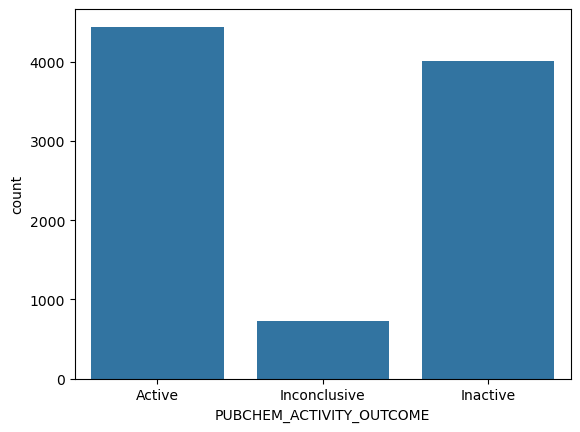

In [75]:
sns.countplot(data=ncats, x="PUBCHEM_ACTIVITY_OUTCOME")

In [76]:
ncats_actives = ncats.query("PUBCHEM_ACTIVITY_OUTCOME == 'Active'")
ncats_actives["active"] = True

/var/folders/4h/4_v2nd3n4dn85gnfv734rbbc0000gn/T/ipykernel_54096/667201052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncats_actives["active"] = True


In [77]:
ncats_actives.head()

,CANONICAL_SMILES,INCHIKEY,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_CID,dataset,data_type,common_name,action_type,active
0,COc1ccccc1-c1ccc2ncnc(N3CCOCC3)c2c1,JCTMVLMTEATXTB-UHFFFAOYSA-N,Active,3233812.0,ncats_adme_aid410,assay,NaN,inhibitor,True
1,Cc1ccccc1-c1ccc2ncnc(N3CCOCC3)c2c1,WNHINCBEZIFTDR-UHFFFAOYSA-N,Active,3234793.0,ncats_adme_aid410,assay,NaN,inhibitor,True
2,COc1ccccc1-c1cc(Nc2cc[nH]n2)ncn1,AYLDUSFSYKQSKR-UHFFFAOYSA-N,Active,3235003.0,ncats_adme_aid410,assay,NaN,inhibitor,True
3,Fc1ccc(Nc2ncnc3ccc(-c4ccoc4)cc23)cc1,HCVDOQOETCJCDC-UHFFFAOYSA-N,Active,3234899.0,ncats_adme_aid410,assay,NaN,inhibitor,True
4,Cc1cccc(CNc2ccnc(-c3cccnc3)n2)c1,CUCAHHHOAQSGHY-UHFFFAOYSA-N,Active,3233467.0,ncats_adme_aid410,assay,NaN,inhibitor,True


In [78]:
ncats_actives = ncats_actives[keep_cols_all]
ncats_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
0,COc1ccccc1-c1ccc2ncnc(N3CCOCC3)c2c1,JCTMVLMTEATXTB-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
1,Cc1ccccc1-c1ccc2ncnc(N3CCOCC3)c2c1,WNHINCBEZIFTDR-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
2,COc1ccccc1-c1cc(Nc2cc[nH]n2)ncn1,AYLDUSFSYKQSKR-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
3,Fc1ccc(Nc2ncnc3ccc(-c4ccoc4)cc23)cc1,HCVDOQOETCJCDC-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
4,Cc1cccc(CNc2ccnc(-c3cccnc3)n2)c1,CUCAHHHOAQSGHY-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
7051,CCCCOc1ccc(CC(O)=NO)cc1,MXJWRABVEGLYDG-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
7052,CCCCc1ccc2[nH]c(NC(=O)OC)nc2c1,YRWLZFXJFBZBEY-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
7053,CC(C(=O)O)c1ccc(C(=O)c2ccccc2)s1,GUHPRPJDBZHYCJ-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
7054,CO[C@@]12C[C@@H](COC(=O)c3cncc(Br)c3)CN(C)[C@H...,YSEXMKHXIOCEJA-OECQAKIHSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor


# Veith

Assay data from veith et al


In [79]:
veith = pd.read_csv("processed/veith_2009.csv")
veith.head()

,PubChemCID,SMILES,Active,CANONICAL_SMILES,INCHIKEY,dataset,data_type,common_name,action_type
0,6602638.0,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl,0,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1,ULLDFBZUOXJYID-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor
1,644510.0,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,1,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,VTLXYSNKFGEFDQ-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor
2,1960010.0,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,1,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,JNCIAHUGNMSHOQ-YPKPFQOOSA-N,veith_2009,assay,NaN,inhibitor
3,644675.0,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,1,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,GEUQHFHLRHDTPU-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor
4,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1,Clc1ccccc1-c1n[nH]c(-c2ccccc2)n1,AHWJVKKSEVAPMR-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor


<Axes: xlabel='Active', ylabel='count'>

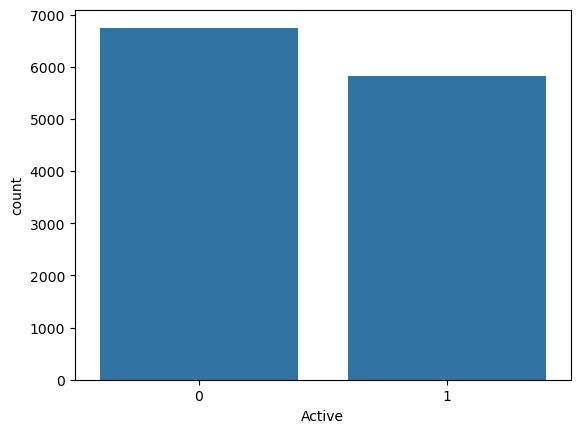

In [80]:
sns.countplot(data=veith, x="Active")

In [81]:
veith_actives = veith.query("Active == 1")
veith_actives["active"] = True
veith_actives = veith_actives[keep_cols_all]

/var/folders/4h/4_v2nd3n4dn85gnfv734rbbc0000gn/T/ipykernel_54096/1919675608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veith_actives["active"] = True


In [82]:
veith_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
1,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,VTLXYSNKFGEFDQ-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
2,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,JNCIAHUGNMSHOQ-YPKPFQOOSA-N,True,veith_2009,assay,NaN,inhibitor
3,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,GEUQHFHLRHDTPU-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
4,Clc1ccccc1-c1n[nH]c(-c2ccccc2)n1,AHWJVKKSEVAPMR-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
5,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,OJEJKWUQFREXKZ-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
11950,Cc1cc(OCc2ccc([N+](=O)[O-])cc2)c2c3c(c(=O)oc2c...,ZFOUCGXCHMOGAD-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
11952,COc1cc(CNC2CCCC2)cc(Cl)c1OCc1ccccc1Cl,PKSMIXVRARBJHK-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
11956,O=C(CSc1nnc(SCc2cccc3ccccc23)s1)c1ccc2c(c1)OCO2,WOJKMKPLQQABSF-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
11961,Cc1ccnc(NC(=S)NC(=O)c2ccco2)c1,WBCVNVHMWHVHQN-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor


# Tox 21
This is from AID 1671199

In [83]:
tox = pd.read_csv("processed/tox21_adme_aid1671199.csv")

In [84]:
tox.head()

,CANONICAL_SMILES,INCHIKEY,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_CID,dataset,data_type,common_name,action_type
0,CN1C(=S)CN=C(c2ccccc2)c2cc(Cl)ccc21,MWGWTOPCKLQYEU-UHFFFAOYSA-N,Inconclusive,17931.0,tox_adme_aid1671199,assay,NaN,inhibitor
1,COC(=O)C1[C@H]2C[C@@H]3c4[nH]c5cc(OC)ccc5c4CCN...,KFDDPVMIQMFHBI-VEFOKBAZSA-N,Inconclusive,3045407.0,tox_adme_aid1671199,assay,NaN,inhibitor
2,C[C@]12Cc3nonc3C[C@@H]1CC[C@@H]1[C@@H]2CC[C@@]...,RGLLOUBXMOGLDQ-IVEVATEUSA-N,Inactive,14708.0,tox_adme_aid1671199,assay,NaN,inhibitor
3,C/C(=C(\CCO)SS/C(CCO)=C(\C)N(C=O)Cc1cnc(C)nc1N...,GFEGEDUIIYDMOX-KBNZVFGVSA-N,Inactive,3085168.0,tox_adme_aid1671199,assay,NaN,inhibitor
4,Cc1cc(C)c(NC(=O)CN(CC(=O)O)CC(=O)O)c(C)c1Br,MHPZZZZLAQGTHT-UHFFFAOYSA-N,Inactive,54158.0,tox_adme_aid1671199,assay,NaN,inhibitor


<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='count'>

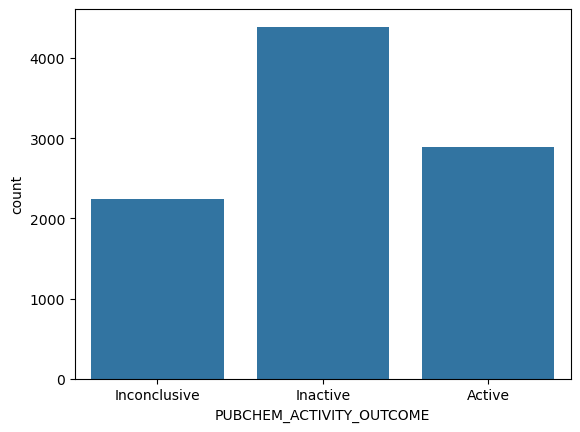

In [85]:
sns.countplot(data=tox, x="PUBCHEM_ACTIVITY_OUTCOME")

In [86]:
tox_actives = tox.query("PUBCHEM_ACTIVITY_OUTCOME == 'Active'")
tox_actives["active"] = True

/var/folders/4h/4_v2nd3n4dn85gnfv734rbbc0000gn/T/ipykernel_54096/1801113044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tox_actives["active"] = True


In [87]:
tox_actives.head()

,CANONICAL_SMILES,INCHIKEY,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_CID,dataset,data_type,common_name,action_type,active
8,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,Active,11956149.0,tox_adme_aid1671199,assay,NaN,inhibitor,True
10,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,Active,71580.0,tox_adme_aid1671199,assay,NaN,inhibitor,True
11,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,Active,110689.0,tox_adme_aid1671199,assay,NaN,inhibitor,True
22,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,Active,60196319.0,tox_adme_aid1671199,assay,NaN,inhibitor,True
23,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,Active,43398.0,tox_adme_aid1671199,assay,NaN,inhibitor,True


In [88]:
tox_actives = tox_actives[keep_cols_all]
tox_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
8,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
10,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
11,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
22,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
23,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
9506,C/C=C/c1ccc(OC)c(OC)c1,NNWHUJCUHAELCL-SNAWJCMRSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
9511,SCc1ccco1,ZFFTZDQKIXPDAF-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
9513,Cc1ccc2sc3cccc(C)c3c2c1,KMPJENUWHPZRGZ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
9514,Cc1c(Cl)c(=O)oc2cc(O)ccc12,ODZHLDRQCZXQFQ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor


# Chembl

The chembl data is an aggregation for CYP1A2

Some postprocessing steps have been applied to select high quality actives from the range of assays available, defs not the only way to do this. 




* Select assays with IC50, AC50, pIC50, XC50, EC50, Ki or potency endpoints
* Select assays in nM
* Select assays with >=  N molecules (10)
* Select compounds with mean pChembl > 5 accross all assays
* Select compounds that appear in >= L of assays



In [89]:
chembl_actives = pd.read_csv("processed/chembl_active_selected.csv")
chembl_actives.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
0,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,7.594167,0.585390,ALPHA-NAPHTHOFLAVONE,12,NaN,ChEMBL_curated,True
1,CC(C)NC[C@@H](O)COc1cccc2ccccc12,AQHHHDLHHXJYJD-CQSZACIVSA-N,6.385714,0.414039,DEXPROPRANOLOL,7,NaN,ChEMBL_curated,True
2,Cc1nc2c(=O)n(C)c(=O)n(Cc3ccco3)c2[nH]1,KGQZGCIVHYLPBH-UHFFFAOYSA-N,5.324000,0.673817,FURAFYLLINE,5,NaN,ChEMBL_curated,True
3,COC(=O)C1=C(C)N=C(C)C(C(=O)OC)C1c1ccccc1[N+](=...,OSUCQKNXQBPLDG-UHFFFAOYSA-N,6.715000,0.817537,NIFEDIPINE,4,NaN,ChEMBL_curated,True
4,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,5.925000,0.460326,QUERCETIN,4,NaN,ChEMBL_curated,True


# FDA approved

Compounds the FDA really reccomends you try

In [90]:
fda = pd.read_csv("./processed/fda.csv")

# Combine everything


## NOTE

common name being blank is not that these compounds do not have a common name, but that they need to be pulled from pubchem

In [91]:
combined_literature = pd.concat([tox_actives, ncats_actives, veith_actives, fda])
combined_literature

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended
8,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,NaN
10,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,NaN
11,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,NaN
22,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,NaN
23,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2,COCCCC/C(=N\OCCN)c1ccc(C(F)(F)F)cc1,CJOFXWAVKWHTFT-XSFVSMFZSA-N,True,FDA,NaN,fluvoxamine,inhibitor,COCCCC/C(=N\OCCN)c1ccc(C(F)(F)F)cc1,True
3,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,CRCWUBLTFGOMDD-UHFFFAOYSA-N,True,FDA,NaN,ethoxyresorufin,substrate,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,True
4,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,True,FDA,NaN,phenacetin,substrate,CCOc1ccc(NC(C)=O)cc1,True
5,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,True,FDA,NaN,caffeine,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,True


In [92]:
combined_literature["FDA_recommended"] = combined_literature["FDA_recommended"].fillna(False)

In [93]:
combined_literature.INCHIKEY.duplicated().sum()  # close same result with SMILES

3541

In [94]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [95]:
combined_literature_chembl = pd.concat([combined_literature, chembl_actives])

In [96]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays
8,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
10,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
11,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
22,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
23,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6447,Cc1noc(NC(=O)Nc2ccccc2F)c1C#N,XKXNHDFGHFCRBG-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.1,NaN,1.0
6448,CS(=O)(=O)Nc1ccc(Nc2c3ccccc3nc3ccccc23)cc1,QDTNJAYLSJACEQ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.4,NaN,1.0
6449,Oc1ccc2ccccc2c1/C=C\c1ccc2c(Br)cc(Br)c(O)c2n1,NGEIVDFIXGKIKP-VURMDHGXSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.4,NaN,1.0
6450,Cn1ncc2c(NCCc3ccccc3)nc(Cl)nc21,KRNAPVRIULRUAL-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.6,NaN,1.0


In [97]:
combined_literature_chembl.FDA_recommended.value_counts()

FDA_recommended
False    13157
 True        7
Name: count, dtype: int64

In [98]:
combined_literature_chembl.dataset.value_counts()

dataset
ChEMBL_curated         6452
veith_2009             5826
ncats_adme_aid410      4438
tox_adme_aid1671199    2893
FDA                       7
Name: count, dtype: int64

In [99]:
combined_literature_chembl.INCHIKEY.duplicated().sum()

8464

In [100]:
combined_literature_chembl.INCHIKEY.isna().sum()

0

In [101]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays
8,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
10,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
11,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
22,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
23,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6447,Cc1noc(NC(=O)Nc2ccccc2F)c1C#N,XKXNHDFGHFCRBG-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.1,NaN,1.0
6448,CS(=O)(=O)Nc1ccc(Nc2c3ccccc3nc3ccccc23)cc1,QDTNJAYLSJACEQ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.4,NaN,1.0
6449,Oc1ccc2ccccc2c1/C=C\c1ccc2c(Br)cc(Br)c(O)c2n1,NGEIVDFIXGKIKP-VURMDHGXSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.4,NaN,1.0
6450,Cn1ncc2c(NCCc3ccccc3)nc(Cl)nc21,KRNAPVRIULRUAL-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.6,NaN,1.0


In [102]:
appears = combined_literature_chembl.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

,appears_in_N_datasets
INCHIKEY,
AABYLPRACHMDSN-BIWBPYCESA-N,1
AABYLPRACHMDSN-REETXPBOSA-N,1
AACUVVMEFJMWSX-UHFFFAOYSA-N,1
AADCDMQTJNYOSS-LBPRGKRZSA-N,4
AADVZSXPNRLYLV-XJGFJUGXSA-N,1
...,...
ZZWKZQDOSJAGGF-WLNFFEQUSA-N,1
ZZYASVWWDLJXIM-UHFFFAOYSA-N,1
ZZYJHNUULCMTJL-UHFFFAOYSA-N,1


In [103]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

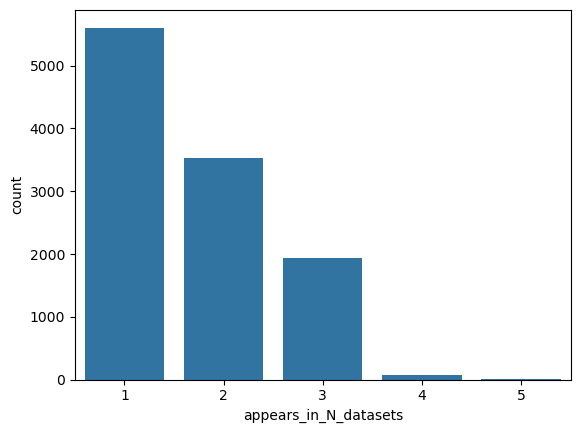

In [104]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [105]:
combined_literature_chembl_w_counts = combined_literature_chembl.merge(appears, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets
0,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1
1,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1
2,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1
3,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1
4,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19611,O=C(c1cnc(N2CCN(c3ncccn3)CC2)c2ccccc12)N1CCN(c...,BRCLUAPSDFUPCL-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,7.60,NaN,1.0,1
19612,Cc1ncoc1-c1nnc(SCCCN2CC[C@@]3(C[C@@H]3c3ccc(C(...,ZIQDGXNDXRMRPM-VGOFRKELSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.10,NaN,1.0,1
19613,CN(CCC(=O)O)S(=O)(=O)c1ccccc1,LFRXLESUXXFAIP-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.50,NaN,1.0,1
19614,O/N=c1\cc(-c2ccccc2)oc2c1ccc1ccccc12,YITNDIKCLAWTFT-LVZFUZTISA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,7.13,NaN,1.0,1


In [106]:
df_dummies = pd.get_dummies(combined_literature_chembl_w_counts['dataset'], prefix='dataset').join(combined_literature_chembl_w_counts["INCHIKEY"])
df_dummies

,dataset_ChEMBL_curated,dataset_FDA,dataset_ncats_adme_aid410,dataset_tox_adme_aid1671199,dataset_veith_2009,INCHIKEY
0,False,False,False,True,False,PUAQLLVFLMYYJJ-UHFFFAOYSA-N
1,False,False,False,True,False,RHCSKNNOAZULRK-UHFFFAOYSA-N
2,False,False,False,True,False,WGTASENVNYJZBK-UHFFFAOYSA-N
3,False,False,False,True,False,HXJKWPGVENNMCC-VIFPVBQESA-N
4,False,False,False,True,False,YQYUWUKDEVZFDB-UHFFFAOYSA-N
...,...,...,...,...,...,...
19611,True,False,False,False,False,BRCLUAPSDFUPCL-UHFFFAOYSA-N
19612,True,False,False,False,False,ZIQDGXNDXRMRPM-VGOFRKELSA-N
19613,True,False,False,False,False,LFRXLESUXXFAIP-UHFFFAOYSA-N
19614,True,False,False,False,False,YITNDIKCLAWTFT-LVZFUZTISA-N


In [107]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [108]:
combined_literature_chembl_w_counts = combined_literature_chembl_w_counts.merge(df_result, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_ncats_adme_aid410,dataset_tox_adme_aid1671199,dataset_veith_2009
0,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,True,False
1,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,True,False
2,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,True,False
3,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,True,False
4,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19611,O=C(c1cnc(N2CCN(c3ncccn3)CC2)c2ccccc12)N1CCN(c...,BRCLUAPSDFUPCL-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,7.60,NaN,1.0,1,True,False,False,False,False
19612,Cc1ncoc1-c1nnc(SCCCN2CC[C@@]3(C[C@@H]3c3ccc(C(...,ZIQDGXNDXRMRPM-VGOFRKELSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.10,NaN,1.0,1,True,False,False,False,False
19613,CN(CCC(=O)O)S(=O)(=O)c1ccccc1,LFRXLESUXXFAIP-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.50,NaN,1.0,1,True,False,False,False,False
19614,O/N=c1\cc(-c2ccccc2)oc2c1ccc1ccccc12,YITNDIKCLAWTFT-LVZFUZTISA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,7.13,NaN,1.0,1,True,False,False,False,False


In [109]:
combined_literature_chembl_w_counts.action_type.value_counts()

action_type
inhibitor     13271
 substrate        4
 inhibitor        3
Name: count, dtype: int64

In [110]:
combined_literature_chembl_w_counts.INCHIKEY.nunique()

11152

In [111]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

19307

In [112]:
# we can just sort by appears_in_N_ChEMBL_assays to get all the chembl data at the top, then uniquify on INCHIKEY

combined_literature_chembl_w_counts.sort_values(["appears_in_N_ChEMBL_assays", "appears_in_N_datasets"], ascending=[False,False],  inplace=True)

In [113]:
# fill common name from gropupby 
combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [114]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

18593

In [115]:
combined_literature_chembl_w_counts.drop(columns=["dataset","data_type"], inplace=True)

In [116]:
combined_literature_chembl_w_counts.head()

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_ncats_adme_aid410,dataset_tox_adme_aid1671199,dataset_veith_2009
5789,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,True,ALPHA-NAPHTHOFLAVONE,NaN,NaN,NaN,7.594167,0.585390,12.0,2,True,False,True,False,False
2729,CC(C)NC[C@@H](O)COc1cccc2ccccc12,AQHHHDLHHXJYJD-CQSZACIVSA-N,True,DEXPROPRANOLOL,NaN,NaN,NaN,6.385714,0.414039,7.0,3,True,False,True,True,False
3179,Cc1nc2c(=O)n(C)c(=O)n(Cc3ccco3)c2[nH]1,KGQZGCIVHYLPBH-UHFFFAOYSA-N,True,FURAFYLLINE,NaN,NaN,NaN,5.324000,0.673817,5.0,5,True,True,True,True,True
534,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,True,QUERCETIN,NaN,NaN,NaN,5.925000,0.460326,4.0,4,True,False,True,True,True
1697,CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21,ZPEIMTDSQAKGNT-UHFFFAOYSA-N,True,CHLORPROMAZINE HYDROCHLORIDE,NaN,NaN,NaN,5.482500,0.363169,4.0,4,True,False,True,True,True


In [117]:
fda_reccomends_mask = combined_literature_chembl_w_counts.INCHIKEY.isin(fda.INCHIKEY)

fda_reccomends_mask

5789     False
2729     False
3179      True
534      False
1697     False
         ...  
18074    False
18079    False
18090     True
18091     True
18092     True
Name: INCHIKEY, Length: 19616, dtype: bool

In [118]:
combined_literature_chembl_w_counts["FDA_recommended"][fda_reccomends_mask] = True

/var/folders/4h/4_v2nd3n4dn85gnfv734rbbc0000gn/T/ipykernel_54096/383759248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_literature_chembl_w_counts["FDA_recommended"][fda_reccomends_mask] = True


In [119]:
combined_literature_chembl_w_counts.drop_duplicates(subset="INCHIKEY", inplace=True)

In [120]:
combined_literature_chembl_w_counts["action_type"] = combined_literature_chembl_w_counts["action_type"].fillna("unknown")

In [121]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["appears_in_N_ChEMBL_assays"].fillna(0) + combined_literature_chembl_w_counts["appears_in_N_datasets"].fillna(0)

In [122]:
combined_literature_chembl_w_counts.sort_values("inclusion_score", ascending=False, inplace=True)

In [124]:
combined_literature_chembl_w_counts.to_csv("final/actives_final.csv", index=False)

In [125]:
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_ncats_adme_aid410,dataset_tox_adme_aid1671199,dataset_veith_2009,inclusion_score
5789,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,True,ALPHA-NAPHTHOFLAVONE,unknown,NaN,NaN,7.594167,0.585390,12.0,2,True,False,True,False,False,14.0
3179,Cc1nc2c(=O)n(C)c(=O)n(Cc3ccco3)c2[nH]1,KGQZGCIVHYLPBH-UHFFFAOYSA-N,True,FURAFYLLINE,unknown,NaN,True,5.324000,0.673817,5.0,5,True,True,True,True,True,10.0
2729,CC(C)NC[C@@H](O)COc1cccc2ccccc12,AQHHHDLHHXJYJD-CQSZACIVSA-N,True,DEXPROPRANOLOL,unknown,NaN,NaN,6.385714,0.414039,7.0,3,True,False,True,True,False,10.0
534,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,True,QUERCETIN,unknown,NaN,NaN,5.925000,0.460326,4.0,4,True,False,True,True,True,8.0
1697,CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21,ZPEIMTDSQAKGNT-UHFFFAOYSA-N,True,CHLORPROMAZINE HYDROCHLORIDE,unknown,NaN,NaN,5.482500,0.363169,4.0,4,True,False,True,True,True,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,CC(=O)CCc1ccc(OC(C)=O)cc1,UMIKWXDGXDJQJK-UHFFFAOYSA-N,True,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,True,False,1.0
2147,c1cc(CCCc2ccncc2)ccn1,OGNCVVRIKNGJHQ-UHFFFAOYSA-N,True,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,True,False,1.0
2148,O=Cc1ccc(F)c(Br)c1,FAHZIKXYYRGSHF-UHFFFAOYSA-N,True,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,True,False,1.0
2149,O=C(Nc1ccccc1)c1cc(Cl)ccc1O,KGYNGVVNFRUOOZ-UHFFFAOYSA-N,True,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,True,False,1.0
